<h1> Business Understanding </h1>


<p> The StackOverflow Developer's Survey contains responses from programming veterans across the industry. It includes a column called CousinEducation, which contains recommendations for breaking into the field of software development. At the same time, the data contains crucial information on factors that influence salary for software developers. </p>

<p> Based on the data, we can ask the following questions: </p>

<ol>
    <li> How to break into the field? </li>
    <li> Are respondents with higher formal education biased towards their own degrees? </li>
    <li> Are bootcamps worth it? </li>
    <li> How do different data attributes affect Job Satisfaction? </li>
    
</ol>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import missingno as msno
from collections import defaultdict
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('E:\DataScienceProjects\survey-results-public.csv')
schema = pd.read_csv('E:\DataScienceProjects\survey-results-schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Data Understanding</h1>

In [2]:
rows = df.shape[0]
columns = df.shape[1]
Prof_Dev = df.loc[(df["Professional"] == "Professional developer") | (df["Professional"] == "Used to be a professional developer") ]

print("Number of rows: {}\nNumber of columns: {}".format(rows,columns))




Number of rows: 51392
Number of columns: 154


0.7030471668742216


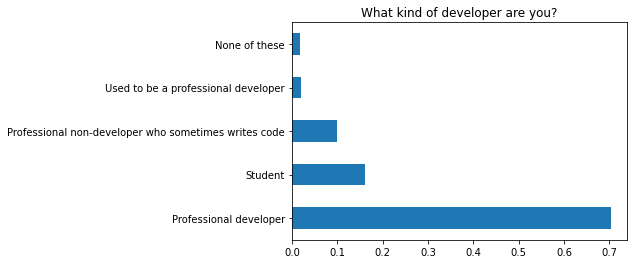

In [3]:
ProfList= df["Professional"].value_counts()
status_vals = pd.Series(ProfList) #Provide a pandas series of the counts for each Professional status
status_vals
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

print(df[df["Professional"] == "Professional developer"].shape[0]/df.Professional.shape[0])
(status_vals/df.shape[0]).plot(kind="barh");


plt.title("What kind of developer are you?");




0.1581763698630137
0.42047400373599003
0.21678471357409715


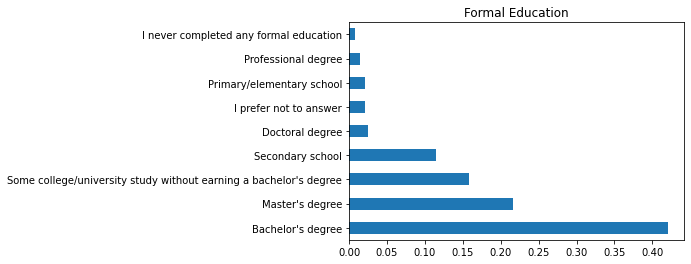

In [4]:
ed_vals = pd.Series(df["FormalEducation"].value_counts())
#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.
print(df[df.FormalEducation == "Some college/university study without earning a bachelor's degree"].shape[0]/df.FormalEducation.shape[0])
print(df[df.FormalEducation == "Bachelor's degree"].shape[0]/df.FormalEducation.shape[0])
print(df[df.FormalEducation == "Master's degree"].shape[0]/df.FormalEducation.shape[0])


(ed_vals/df.shape[0]).plot(kind="barh");
plt.title("Formal Education");

People without Bachelor's degree or colllege education: 0.07579350110470442
college/university study without earning a bachelor's degree: 0.14910815325753085
Bachelor's: 0.47642399094681254
Master's: 0.25014819205690575
Doctoral: 0.022525192649673977
Professional: 0.015088645794039984
0.7265721830037183
0.9132941747049631


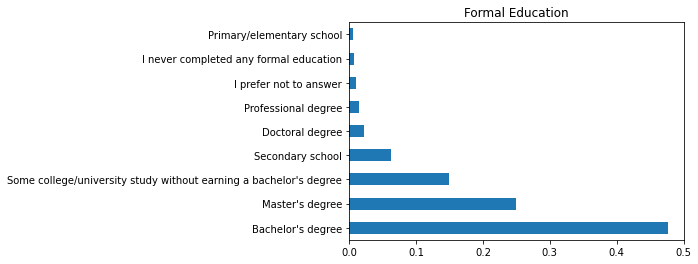

In [5]:
ed_vals = pd.Series(Prof_Dev["FormalEducation"].value_counts())
#Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.
var1 = Prof_Dev.loc[(Prof_Dev.FormalEducation == "Some college/university study without earning a bachelor's degree")].shape[0]/Prof_Dev.FormalEducation.shape[0]
NonDegree = Prof_Dev.loc[(Prof_Dev.FormalEducation == "I never completed any formal education") | (Prof_Dev.FormalEducation == "Secondary school") | (Prof_Dev.FormalEducation == "Primary/elementary school")].shape[0]/Prof_Dev.FormalEducation.shape[0]
var2 = Prof_Dev[Prof_Dev.FormalEducation == "Bachelor's degree"].shape[0]/ (Prof_Dev.FormalEducation.shape[0] - np.sum(Prof_Dev.FormalEducation.isnull()))
var3 = Prof_Dev[Prof_Dev.FormalEducation == "Master's degree"].shape[0]/(Prof_Dev.FormalEducation.shape[0] - np.sum(Prof_Dev.FormalEducation.isnull()))
doc = Prof_Dev[Prof_Dev.FormalEducation == "Doctoral degree"].shape[0]/(Prof_Dev.FormalEducation.shape[0] - np.sum(Prof_Dev.FormalEducation.isnull()))
prof = Prof_Dev[Prof_Dev.FormalEducation == "Professional degree"].shape[0]/(Prof_Dev.FormalEducation.shape[0] - np.sum(Prof_Dev.FormalEducation.isnull()))
print("People without Bachelor's degree or colllege education: {}".format(NonDegree))
print("college/university study without earning a bachelor's degree: {}".format(var1))
print("Bachelor's: {}".format(var2))
print("Master's: {}".format(var3))
print("Doctoral: {}".format(doc))
print("Professional: {}".format(prof))
print(var2+var3)
print(var1+var2+var3+doc+prof)
(ed_vals/Prof_Dev.shape[0]).plot(kind="barh");
plt.title("Formal Education");

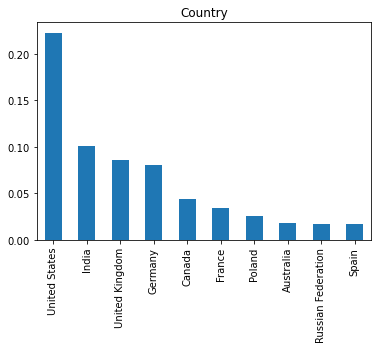

In [6]:
count_vals = pd.Series(df["Country"].value_counts())
#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

<h2> How to break into the field? </h2>

<p> In order to understand how to break into the field, we will look at the CousinEducation field. The get_description fnction  takes the schema dataframe and the column as a string, and returns a string of the description for that column. </p>



In [7]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema.Column == column_name]['Question'])[0]
    return desc


for i in range(-10,0):
    print(get_description(df.columns[i])) # This should return a string of the first column description




The people who run Stack Overflow are just in it for the money
Which of the following do you currently identify as?
What is the highest level of education received by either of your parents?
Which of the following do you identify as?
This survey was too long
The questions were interesting
The questions were confusing
I'm interested in learning how other developers answered
What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?
You said before that you are currently learning how to program. When you have completed your studies, what annual salary do you expect to earn in your first job after graduation?


In [8]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

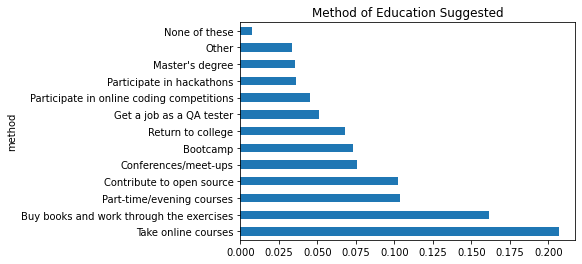

In [9]:

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row, add the devs
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    #clean up the resulting dataframe8
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]
def clean_and_plot(df, title='Method of Education Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    global newvar
    newvar = study_df
    if plot:
        (study_df/study_df.sum()).plot(kind='barh', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(Prof_Dev)



In [10]:
print(5565/np.sum(newvar['count']))
print(3984/np.sum(newvar['count']))
print(5630/np.sum(newvar['count']))
print(4108/np.sum(newvar['count']))
newvar['count']

0.10244656762578008
0.07334180151322693
0.10364315826291857
0.07562452826715267


method
Take online courses                          11250
Buy books and work through the exercises      8772
Part-time/evening courses                     5630
Contribute to open source                     5565
Conferences/meet-ups                          4108
Bootcamp                                      3984
Return to college                             3679
Get a job as a QA tester                      2758
Participate in online coding competitions     2452
Participate in hackathons                     1952
Master's degree                               1942
Other                                         1822
None of these                                  407
Name: count, dtype: int64

<h3> Insights: How to break into the field?</h3>
<p>
<ul>    
<li> <b> 20.7% of professional developers</b> suggest taking online courses is the best way to enter the field of software development. </li>

<li> <b>16.1% of professional developers</b> recommend studying textbooks and solving exercises is also a great way to gain the skills required in the industry.  </li>
 
<li> <b> 10.36% of professional developers </b>suggest part-time and evening courses  courses for breaking into software development. </li>

<li> <b> 10.24% of respondents </b> suggest contributing to open-source projects to break into software development. </li>
    
<li> <b> 7.56% of industry professionals </b> advise meeting industry professionals and seeking opportunities. </li>
    
</ul>    
</p>

<h2> Are respondents with higher formal education biased towards their own degrees? </h2>

In [11]:


def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral"):
        return 1
    else:
        return 0
Prof_Dev['HigherEd'] = Prof_Dev["FormalEducation"].apply(higher_ed)
higher_ed_perc = Prof_Dev['HigherEd'].mean()
    

ed_1 = Prof_Dev[Prof_Dev['HigherEd'] == 1] # Subset df to only those with HigherEd of 1
ed_0 = Prof_Dev[Prof_Dev['HigherEd'] == 0] # Subset df to only those with HigherEd of 0



PeopleWithMasters = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
PeopleWithoutMasters = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(PeopleWithMasters, PeopleWithoutMasters, left_index=True, right_index=True)
comp_df.columns = ['PeopleWithMasters', 'PeopleWithoutMasters']
comp_df['Diff_HigherEd_Vals'] = comp_df['PeopleWithMasters'] - comp_df['PeopleWithoutMasters']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


<ipython-input-11-f3925c103f25>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prof_Dev['HigherEd'] = Prof_Dev["FormalEducation"].apply(higher_ed)


,PeopleWithMasters,PeopleWithoutMasters,Diff_HigherEd_Vals
method,,,
Take online courses,0.205981,0.207471,-0.001490
Buy books and work through the exercises,0.162241,0.161236,0.001005
Part-time/evening courses,0.103474,0.103699,-0.000225
Contribute to open source,0.097225,0.104164,-0.006938
Bootcamp,0.072305,0.073683,-0.001377
Return to college,0.070222,0.066906,0.003316
Conferences/meet-ups,0.066503,0.078624,-0.012121
Master's degree,0.060329,0.027668,0.032661
Get a job as a QA tester,0.050138,0.050981,-0.000843


<h3>Insights: Are respondents with higher formal education biased towards their own degrees? </h3>
<p>
    6% of people with Master’s degrees recommended pursuing a Master’s degree, compared to just 2.76% of people who didn’t have a Master’s degree.
    
Out of all the professional developers who recommended a Master’s degree, 67.4% had completed a Master’s or doctoral degree themselves. Therefore, <b> respondents with higher education were twice as likely to recommend a Master’s degree than respondents who didn’t graduate with a Master’s degree </b>.

</p>

<h2> Are bootcamps worth it? </h2>

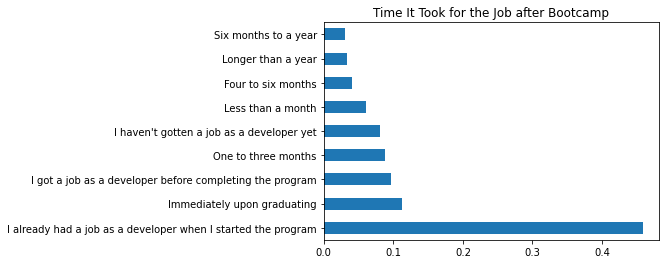

In [13]:
asa = df[df["TimeAfterBootcamp"].isnull() == False]
#print(asa.shape[0] / df.shape[0])
comp = asa["TimeAfterBootcamp"].value_counts()/asa.shape[0]
#print(comp)
comp.plot(kind="barh");
plt.title("Time It Took for the Job after Bootcamp");

<h3> Insights: Are bootcamps worth it?  </h3>
<p>
    <ul>
        <li> Bootcamps are only recommended by <b> 7.33% of professional developers in the survey. </b> </li>
   <li> Approximately <b> 46% of Bootcamp graduates already had a job when they started the program, so it’s hard to tell if the Bootcamp helped them land a new role. </b> </li>
   <li> <b> 9.68% of Bootcamp graduates </b> secured a development job before they completed the Bootcamp, whereas <b> 11.3% of respondents </b> found a job after completing the program. So, <b> at least 20% of individuals earned jobs upon graduation or earlier. </b> </li>
        <li> <b> 6% of graduates </b> succeeded in finding a job in less than a month, whereas <b> 12.8% of graduates had to wait between one to six months. </b> </li>
        <li> <b> 6.26% of participants</b>  had to wait from six months to more than one year to find a job. </li>
        <li> <b> 8.1% of graduates </b> didn’t find jobs after completing the Bootcamp until the time of the survey. </li>

</ul>
</p>

<h2> How do different data attributes affect Job Satisfaction?</h2>

<h3> The impact of programming being a hobby on job satisfaction </h3>
<p> 
    Individuals who contribute to program as a hobby or contribute to open-source have a higher job satisfaction compared to those who don't. 

</p>

In [14]:

df.groupby(df['ProgramHobby']).mean()['JobSatisfaction']


ProgramHobby
No                                           6.833825
Yes, I contribute to open source projects    7.041535
Yes, I program as a hobby                    6.913072
Yes, both                                    7.108041
Name: JobSatisfaction, dtype: float64

<h3> The impact of company size on job satisfaction </h3>
<p> 
    Individuals working in smaller companies have a higher job satisfaction. 

</p>

In [15]:
df.groupby(df['CompanySize']).mean()['JobSatisfaction'] 


CompanySize
1,000 to 4,999 employees    6.884509
10 to 19 employees          7.000799
10,000 or more employees    6.810345
100 to 499 employees        6.937089
20 to 99 employees          6.949092
5,000 to 9,999 employees    6.748153
500 to 999 employees        6.883661
Fewer than 10 employees     7.008749
I don't know                6.842679
I prefer not to answer      7.280835
Name: JobSatisfaction, dtype: float64

<h3> The impact of years spent coding on job satisfaction </h3>
<p> 
    On average, individuals who have been coding for more than 10 years have a higher job satisfaction compared to those who don't. 

</p>

In [16]:
df.groupby(df['YearsProgram'])['JobSatisfaction'].mean()

YearsProgram
1 to 2 years        6.521997
10 to 11 years      7.007168
11 to 12 years      7.021841
12 to 13 years      6.971217
13 to 14 years      7.007874
14 to 15 years      7.026022
15 to 16 years      7.076485
16 to 17 years      7.008081
17 to 18 years      7.143378
18 to 19 years      7.021417
19 to 20 years      7.026971
2 to 3 years        6.744922
20 or more years    7.173002
3 to 4 years        6.837037
4 to 5 years        6.845028
5 to 6 years        6.863687
6 to 7 years        6.866345
7 to 8 years        6.803702
8 to 9 years        6.958616
9 to 10 years       6.889085
Less than a year    6.516441
Name: JobSatisfaction, dtype: float64


<h1> Data Preparation</h1>


<h2> Are there missing values in the data? </h2>
<p> The data set is filled with missing values in all columns except the first six columns. 
    </p>

<AxesSubplot:>

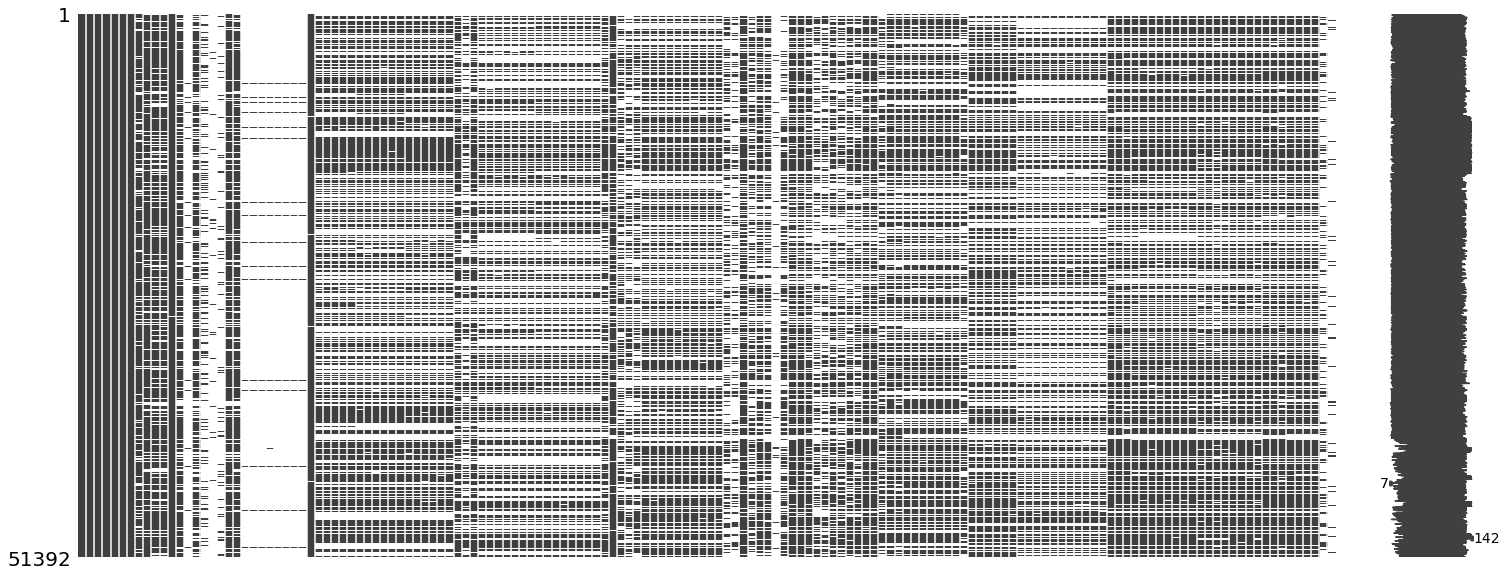

In [17]:
msno.matrix(df)

<h2> How missing values are handled </h2> 

<p> Dropped rows that had missing values in the salary column. </p>

<h2> Are there categorical features and how are they encoded? </h2>

<p> The data set contains several categorical features. I have used dummy variable encoding to transform categorical values into encoded boolean columns. </p>

<h2> Analysis methods and ML models used </h2>

<p> Since we are predicting salary, we must use a regression algorithm to approximate the correct value.    </p>

<h2> Removing Missing Values </h2>

In [18]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y




#Use the function to create X and y
X, y = clean_data(df)  

<h2> Finding the ideal LM Model </h2> 

In [19]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


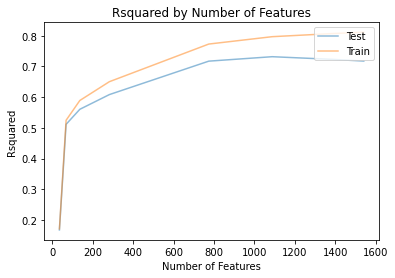

1088
0.7316766986704022
0.7968545363044823


In [20]:
#cutoffs here tell us the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

<h3> Ridge Regression</h3>

In [21]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

18073.34379481925
0.7968545240223955
20388.902067757605
0.7316876439531219


<h3> Lasso Regression</h3>

In [22]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

18073.34368668377
0.7968545264532942
20388.37697754405
0.7317014638613906


<h3> Elastic Net </h3>

In [23]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))


18822.850177384506
0.7796561638584052
20476.867206163028
0.7293674554946454


<h2> Most Influential Factors in Predictiong Salary according to StackOverflow's Developer Survey 2017 </h2> 

In [24]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)


coef_df.head(20)

,est_int,coefs,abs_coefs
42,Country_United States,56731.283619,56731.283619
28,Country_Norway,40550.628110,40550.628110
8,Country_Australia,40111.916279,40111.916279
383,Currency_Swiss francs,36748.955151,36748.955151
15,Country_Denmark,30497.628811,30497.628811
123,YearsCodedJob_20 or more years,29980.868555,29980.868555
27,Country_New Zealand,29954.315738,29954.315738
23,Country_Israel,29510.172957,29510.172957
13,Country_Canada,29363.254074,29363.254074
22,Country_Ireland,28551.627756,28551.627756


<h3> Insights: Most Influential Factors in Predictiong Salary according to StackOverflow's Developer Survey 2017 </h3>
<p> 
    <ul>
    <li> Predicted salary growth of StackOverflow survey participants by an R2 score of 79%. </li>
    <li> Country, years coded during the job were the highest indicators of salary in prediction. </li> </ul> </p>